In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.signal as sig
import os
from jupyterthemes import jtplot

In [2]:
%matplotlib inline
jtplot.reset()
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True

In [53]:
def f_cutoff(R, C):
    return 1/2/np.pi/R/C

def H(R1, R2):
    return 1 + R1/R2

def TransferSallenKeyLowPass(s, H, R1, R2, C1, C2):
    num = H/(R1*R2*C1*C2)
    den = s**2 + s*((1/R1 + 1/R2)/C1 + (1-H)/(R2*C2)) + 1/(R1*R2*C1*C2)
    return num/den

def TransferSallenKeyHighPass(s, H, R1, R2, C1, C2):
    num = H*s**2
    den = s**2 + s*((C2/R2 + C1/R2 + (1-H)*C2/R1)/(C1*C2)) + 1/(R1*R2*C1*C2)
    return num/den

def phi(s):
    return np.arctan(2*np.pi*s)

In [42]:
R = 5.6
C = 22e-6
f_cutoff(R, C)

1291.8420705510987

In [47]:
f, Vin, Vout, phase = np.genfromtxt("LP.txt", skip_header=1).T

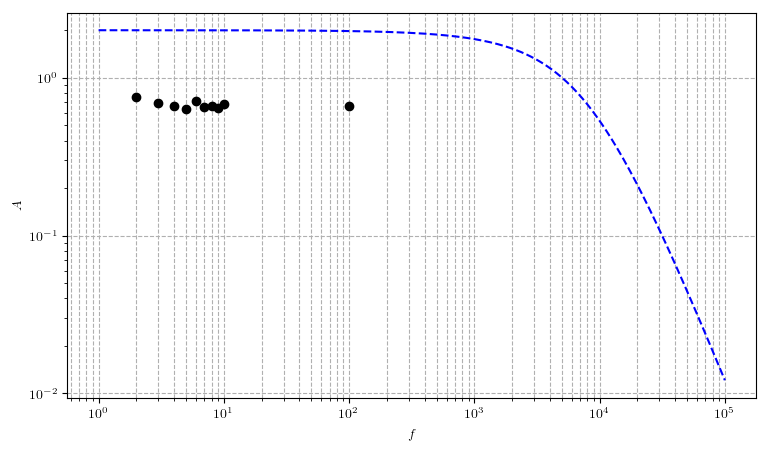

In [71]:
s = np.logspace(0, 5, 500, base=10)

mp.plot(f, Vout/Vin, "ko")
mp.plot(s, TransferSallenKeyLowPass(s, H(R, R), R, R, C, C), "b--")
mp.xscale("log")
mp.yscale("log")
mp.xlabel("$f$")
mp.ylabel("$A$")
mp.grid(which="both", axis="x", linestyle="--")
mp.grid(axis="y", which="major", linestyle="--")
mp.show()

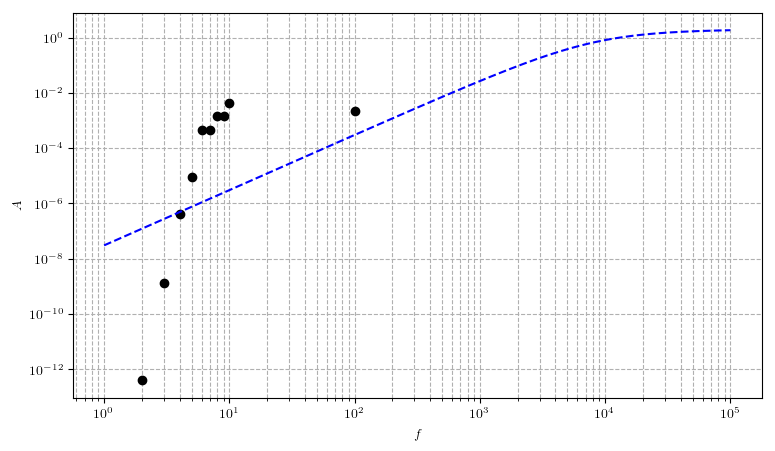

In [68]:
f, Vin, Vout = np.genfromtxt("HP.txt", skip_header=1).T

mp.plot(f, (Vout/5)**20, "ko")
mp.plot(s, TransferSallenKeyHighPass(s, H(R, R), R, R, C, C), "b--")
mp.xscale("log")
mp.yscale("log")
mp.xlabel("$f$")
mp.ylabel("$A$")
mp.grid(which="both", axis="x", linestyle="--")
mp.grid(axis="y", which="major", linestyle="--")
mp.show()